In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [48]:
df = pd.read_csv('./datasets/hotel_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,net_booking_cancelled
0,Resort Hotel,0,342,2015,July,27,1,0,0,NaN,...,3,No Deposit,NaN,0,Transient,0.0,0,0,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,BB,...,4,No Deposit,NaN,0,Transient,0.0,0,0,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,BB,...,0,No Deposit,NaN,0,Transient,75.0,0,0,1.0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,NaN,...,0,No Deposit,304.0,0,Transient,75.0,0,0,1.0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,0,No Deposit,240.0,0,Transient,98.0,0,1,2.0,0


In [49]:
df.isnull().sum()

hotel                              0
is_canceled                        0
lead_time                          0
arrival_date_year                  0
arrival_date_month                 0
arrival_date_week_number           0
arrival_date_day_of_month          0
stays_in_weekend_nights            0
stays_in_week_nights               0
meal                           11939
country                          488
market_segment                     0
distribution_channel           11939
is_repeated_guest                  0
reserved_room_type                 0
assigned_room_type             11939
booking_changes                    0
deposit_type                       0
agent                          16340
days_in_waiting_list               0
customer_type                      0
adr                                0
required_car_parking_spaces        0
total_of_special_requests          0
total_guests                       4
net_booking_cancelled              0
dtype: int64

In [50]:
df.dropna(how = 'any', inplace =True, subset = ['total_guests'])

null_features = ['meal', 'country', 'distribution_channel', 'assigned_room_type', 'agent']

for feature in null_features:
    df[feature].fillna(df[feature].mode()[0], inplace = True)

df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_26460\2422565353.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(df[feature].mode()[0], inplace = True)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,net_booking_cancelled
0,Resort Hotel,0,342,2015,July,27,1,0,0,BB,...,3,No Deposit,9.0,0,Transient,0.0,0,0,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,BB,...,4,No Deposit,9.0,0,Transient,0.0,0,0,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,BB,...,0,No Deposit,9.0,0,Transient,75.0,0,0,1.0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,BB,...,0,No Deposit,304.0,0,Transient,75.0,0,0,1.0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,0,No Deposit,240.0,0,Transient,98.0,0,1,2.0,0


In [51]:
df.isnull().sum()

hotel                          0
is_canceled                    0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
arrival_date_week_number       0
arrival_date_day_of_month      0
stays_in_weekend_nights        0
stays_in_week_nights           0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
is_repeated_guest              0
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
agent                          0
days_in_waiting_list           0
customer_type                  0
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
total_guests                   0
net_booking_cancelled          0
dtype: int64

In [52]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'{col}: {df[col].unique()}') 

hotel: ['Resort Hotel' 'City Hotel']
arrival_date_month: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
meal: ['BB' 'FB' 'HB' 'SC' 'Undefined']
country: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IR

In [53]:
df['arrival_date_month'].value_counts()

arrival_date_month
August       13873
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64

In [54]:
from sklearn.preprocessing import LabelEncoder
cat_var = [var for var in df.columns if df[var].dtype == 'object']


df[cat_var] = df[cat_var].apply(LabelEncoder().fit_transform)

In [55]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,net_booking_cancelled
0,1,0,342,2015,5,27,1,0,0,0,...,3,0,9.0,0,2,0.0,0,0,2.0,0
1,1,0,737,2015,5,27,1,0,0,0,...,4,0,9.0,0,2,0.0,0,0,2.0,0
2,1,0,7,2015,5,27,1,0,1,0,...,0,0,9.0,0,2,75.0,0,0,1.0,0
3,1,0,13,2015,5,27,1,0,1,0,...,0,0,304.0,0,2,75.0,0,0,1.0,0
4,1,0,14,2015,5,27,1,0,2,0,...,0,0,240.0,0,2,98.0,0,1,2.0,0


In [56]:
df['arrival_date_month'].value_counts()

arrival_date_month
1     13873
5     12661
8     11791
10    11160
0     11089
6     10939
11    10508
7      9794
3      8068
9      6794
2      6780
4      5929
Name: count, dtype: int64

In [57]:
df['arrival_date_year'].value_counts()

arrival_date_year
2016    56707
2017    40687
2015    21992
Name: count, dtype: int64

In [58]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,net_booking_cancelled
0,1,0,342,2015,5,27,1,0,0,0,...,3,0,9.0,0,2,0.0,0,0,2.0,0
1,1,0,737,2015,5,27,1,0,0,0,...,4,0,9.0,0,2,0.0,0,0,2.0,0
2,1,0,7,2015,5,27,1,0,1,0,...,0,0,9.0,0,2,75.0,0,0,1.0,0
3,1,0,13,2015,5,27,1,0,1,0,...,0,0,304.0,0,2,75.0,0,0,1.0,0
4,1,0,14,2015,5,27,1,0,2,0,...,0,0,240.0,0,2,98.0,0,1,2.0,0


In [61]:
replace_year = {2015: 0, 2016: 12, 2017: 24}

df['arrival_date_year'] = df['arrival_date_year'].replace(replace_year)
df['month'] = df['arrival_date_year'] + df['arrival_date_month']
df['month'].sample(10)

76444     10
20691     31
113714    30
42422     11
81889     12
12477     29
34135     31
111143    32
74487      1
27737     23
Name: month, dtype: int64

In [63]:
df.drop(['arrival_date_month', 'arrival_date_year'], axis = 1, inplace = True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,net_booking_cancelled,month
0,1,0,342,27,1,0,0,0,135,3,...,0,9.0,0,2,0.0,0,0,2.0,0,5
1,1,0,737,27,1,0,0,0,135,3,...,0,9.0,0,2,0.0,0,0,2.0,0,5
2,1,0,7,27,1,0,1,0,59,3,...,0,9.0,0,2,75.0,0,0,1.0,0,5
3,1,0,13,27,1,0,1,0,59,2,...,0,304.0,0,2,75.0,0,0,1.0,0,5
4,1,0,14,27,1,0,2,0,59,6,...,0,240.0,0,2,98.0,0,1,2.0,0,5


In [64]:
df['is_canceled'].value_counts()

is_canceled
0    75166
1    44220
Name: count, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split

X = df.drop('is_canceled', axis = 1)
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 7, stratify = y)

## Bagging
Bagging, short for Bootstrap Aggregating, is a technique used in machine learning to improve the stability and accuracy of models. It involves creating multiple instances of a model using different subsets of the training data and then combining the predictions of these models.

The significance of bagging in machine learning lies in its ability to reduce overfitting and improve the generalization of models. Overfitting occurs when a model performs well on the training data but poorly on new, unseen data. Bagging helps to mitigate this issue by creating multiple models that are less prone to overfitting.

By combining the predictions of these models, bagging can produce a more robust and accurate model. Additionally, bagging can be used to estimate the uncertainty of predictions, which is important in applications where the model's uncertainty needs to be quantified.

In [68]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

bagging = BaggingClassifier(random_state = 7)
bagging.fit(X_train, y_train)
print(bagging.score(X_train, y_train), bagging.score(X_test, y_test))

0.9883360556183776 0.8822346930228663


## Random Forest
Random Forest is a popular machine learning algorithm that combines the strengths of decision trees and bagging. It is a supervised learning method used for both classification and regression tasks.

The working mechanism of Random Forest involves the following steps:

Bootstrap Sampling: Random Forest starts by creating multiple bootstrap samples from the training data. Each bootstrap sample is a random subset of the training data.

Decision Trees: For each bootstrap sample, a decision tree is built using a subset of the features. The decision tree is trained to predict the target variable based on the selected features.

Feature Selection: During the construction of each decision tree, a subset of features is randomly selected from the available features. This helps to reduce the correlation between trees and prevents overfitting.

Voting: The predictions of all the decision trees are combined using a voting mechanism. The final prediction is made by majority voting or by averaging the predictions.

The significance of Random Forest lies in its ability to handle complex data sets with high dimensionality. It combines the strengths of bagging (reducing overfitting) and decision trees (accuracy and interpretability). Random Forest can handle missing values, handle non-linear relationships, and can handle categorical variables.

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 7)

rf.fit(X_train, y_train)
print(rf.score(X_train, y_train), rf.score(X_test, y_test))

0.9961155086484902 0.8941703660273055


# XGBoost
It is designed to handle large-scale data sets and is particularly effective for handling high-dimensional data.

The working mechanism of XGBoost involves the following steps:

Gradient Boosting: XGBoost uses a gradient boosting framework to iteratively build a sequence of decision trees. Each tree is trained to correct the errors made by the previous tree.

Tree Construction: During the construction of each tree, XGBoost uses a loss function to guide the tree growth. It selects the most important features based on their contribution to the loss function.

Regularization: XGBoost incorporates regularization techniques to prevent overfitting. This is achieved by adding a regularization term to the loss function and penalizing large tree weights.


In [73]:
# !pip install xgboost

In [72]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 7)

xgb.fit(X_train, y_train)
print(xgb.score(X_train, y_train), xgb.score(X_test, y_test))
print(xgb)

0.8965112870126063 0.8795962810955691
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=7, ...)


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

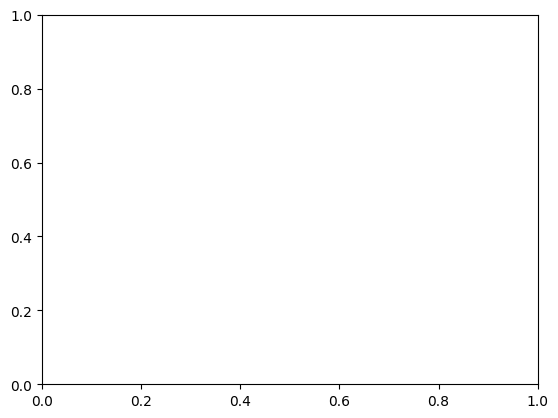

In [80]:
from xgboost import plot_tree, to_graphviz

plot_tree(xgb, num_tree = 20)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

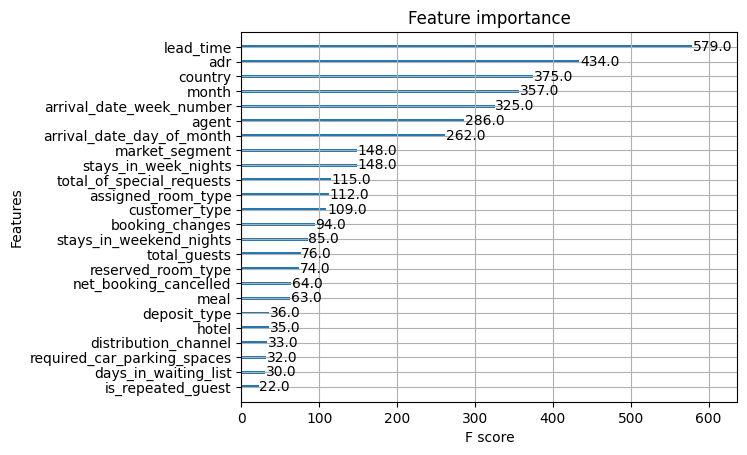

In [81]:
from xgboost import plot_importance
plot_importance(xgb)


[0.0034485  0.01135645 0.00353263 0.00220424 0.00525201 0.00326584
 0.00357147 0.02049052 0.04235513 0.00387496 0.00371863 0.00634911
 0.00808538 0.01260073 0.6239158  0.01491552 0.00542943 0.01508933
 0.00411448 0.10184109 0.0342703  0.00535558 0.05685127 0.00811157]
                        Feature  Importance
14                 deposit_type    0.623916
19  required_car_parking_spaces    0.101841
22        net_booking_cancelled    0.056851
8                market_segment    0.042355
20    total_of_special_requests    0.034270
7                       country    0.020491
17                customer_type    0.015089
15                        agent    0.014916
13              booking_changes    0.012601
1                     lead_time    0.011356
23                        month    0.008112
12           assigned_room_type    0.008085
11           reserved_room_type    0.006349
16         days_in_waiting_list    0.005429
21                 total_guests    0.005356
4       stays_in_weekend_ni

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, 'deposit_type'),
  Text(1, 0, 'required_car_parking_spaces'),
  Text(2, 0, 'net_booking_cancelled'),
  Text(3, 0, 'market_segment'),
  Text(4, 0, 'total_of_special_requests'),
  Text(5, 0, 'country'),
  Text(6, 0, 'customer_type'),
  Text(7, 0, 'agent'),
  Text(8, 0, 'booking_changes'),
  Text(9, 0, 'lead_time'),
  Text(10, 0, 'month'),
  Text(11, 0, 'assigned_room_type'),
  Text(12, 0, 'reserved_room_type'),
  Text(13, 0, 'days_in_waiting_list'),
  Text(14, 0, 'total_guests'),
  Text(15, 0, 'stays_in_weekend_nights'),
  Text(16, 0, 'adr'),
  Text(17, 0, 'distribution_channel'),
  Text(18, 0, 'is_repeated_guest'),
  Text(19, 0, 'meal'),
  Text(20, 0, 'arrival_date_week_number'),
  Text(21, 0, 'hotel'),
  Text(22, 0, 'stays_in_week_nights'),
  Text(23, 0, 'arrival_date_day_of_month')])

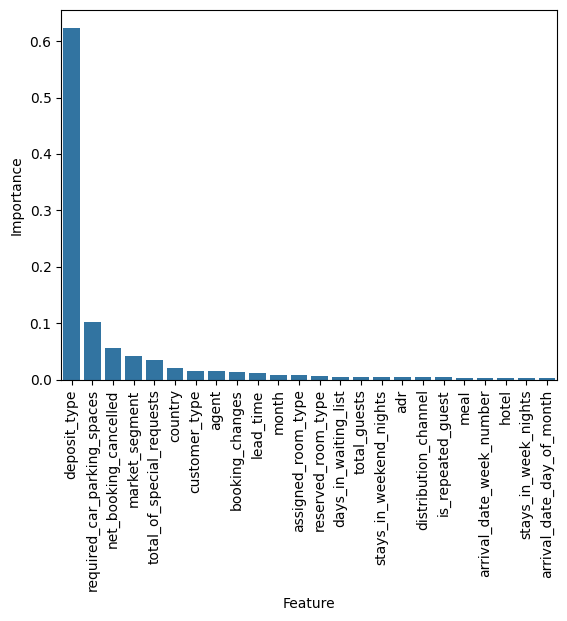

In [103]:
feature_imp = xgb.feature_importances_
print(feature_imp)

# feature_with_their_imp = pd.Series(feature_imp, index = X_train.columns)
# feature_with_their_imp = [(imp, col) for col, imp in zip(X_train.columns, feature_imp)]
# print(feature_with_their_imp)
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # List of feature names
    'Importance': feature_imp
})

# Sort the DataFrame by importances
sorted_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the top 5 features
top_5_features = sorted_df.head(5)
print(sorted_df)

import seaborn as sb
#plot a bar chart of feature_importance_df using seaborn with xtics to rotate by 90 degrees

sb.barplot(data = sorted_df, x = 'Feature', y = 'Importance', orient = 'v')
plt.xticks(rotation = 90)





#### `feature_importances_` Attribute
The feature_importances_ attribute provides the feature importance scores based on the average gain of splits which use the feature. This is calculated using the importance type 'gain' by default.

### `plot_importance` Function
The plot_importance function, by default, shows the importance of features based on the number of times a feature is used to split the data across all trees (also known as 'weight' or 'frequency'). This can be modified to show other types of importance (like 'gain' or 'cover') by setting the importance_type parameter.